<a href="https://colab.research.google.com/github/MaryamShirazi/gitTest/blob/master/MachineLearningIrisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DataSet


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import statistics as stat
import matplotlib.image as mpimg

In [11]:
# %matplotlib inline
# img=mpimg.imread('/content/drive/MyDrive/IrisClassification/iris_types.jpg')
# plt.figure(figsize=(20,40))
# plt.axis('off')
# plt.imshow(img)

##Zero Step


*   Load the Iris dataset.
*  Take a quick look at the data types.
*  Plot the pairwise correlations and histograms.*italicized text*

In [12]:
file = '/content/drive/MyDrive/Iris/iris.csv'
data = pd.read_csv(file)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
data2 = data

In [14]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.837584,3.057718,3.750336,1.193960
std,0.827849,0.432651,1.767409,0.763547
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

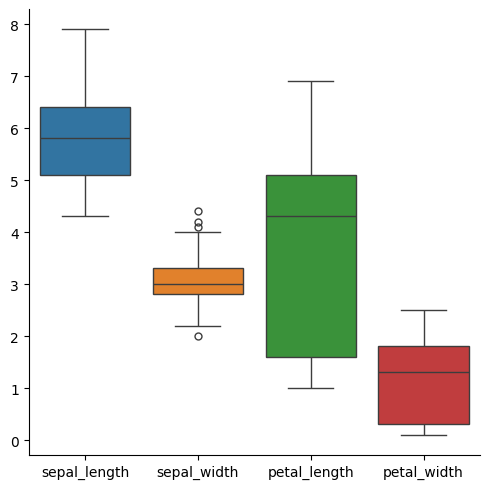

In [16]:
sns.catplot(data=data,kind='box' )

**Removing outliners for sepal width**

In [17]:
iqr = data['sepal_width'].quantile(0.75) - data['sepal_width'].quantile(0.25)
print('iqr = ',iqr)
up = data['sepal_width'].quantile(0.75) + 1.5 * iqr
down = data['sepal_width'].quantile(0.25) - 1.5 * iqr
print('up = {} , down = {}'.format(up,down))
sepalw = data['sepal_width']

outlier = []
for i in sepalw:
    if i > up:
        print('outliner up ',i)
        outlier.append(i)

for i in sepalw:
    if i < down:
        print('outliner down ',i)
        outlier.append(i)




iqr =  0.5
up = 4.05 , down = 2.05
outliner up  4.4
outliner up  4.1
outliner up  4.2
outliner down  2.0


In [18]:
data.sepal_width = data.sepal_width.replace(outlier,data.sepal_width.mean())

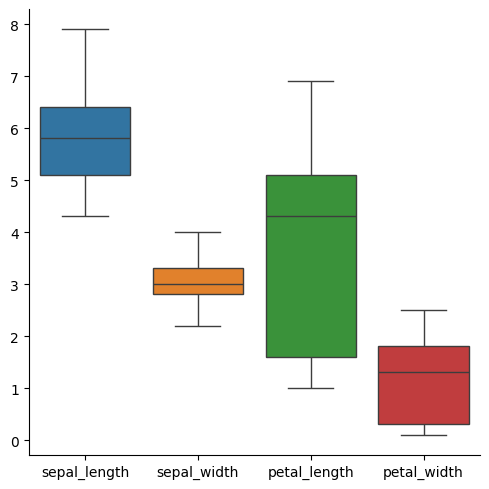

In [19]:
sns.catplot(data=data,kind='box' )

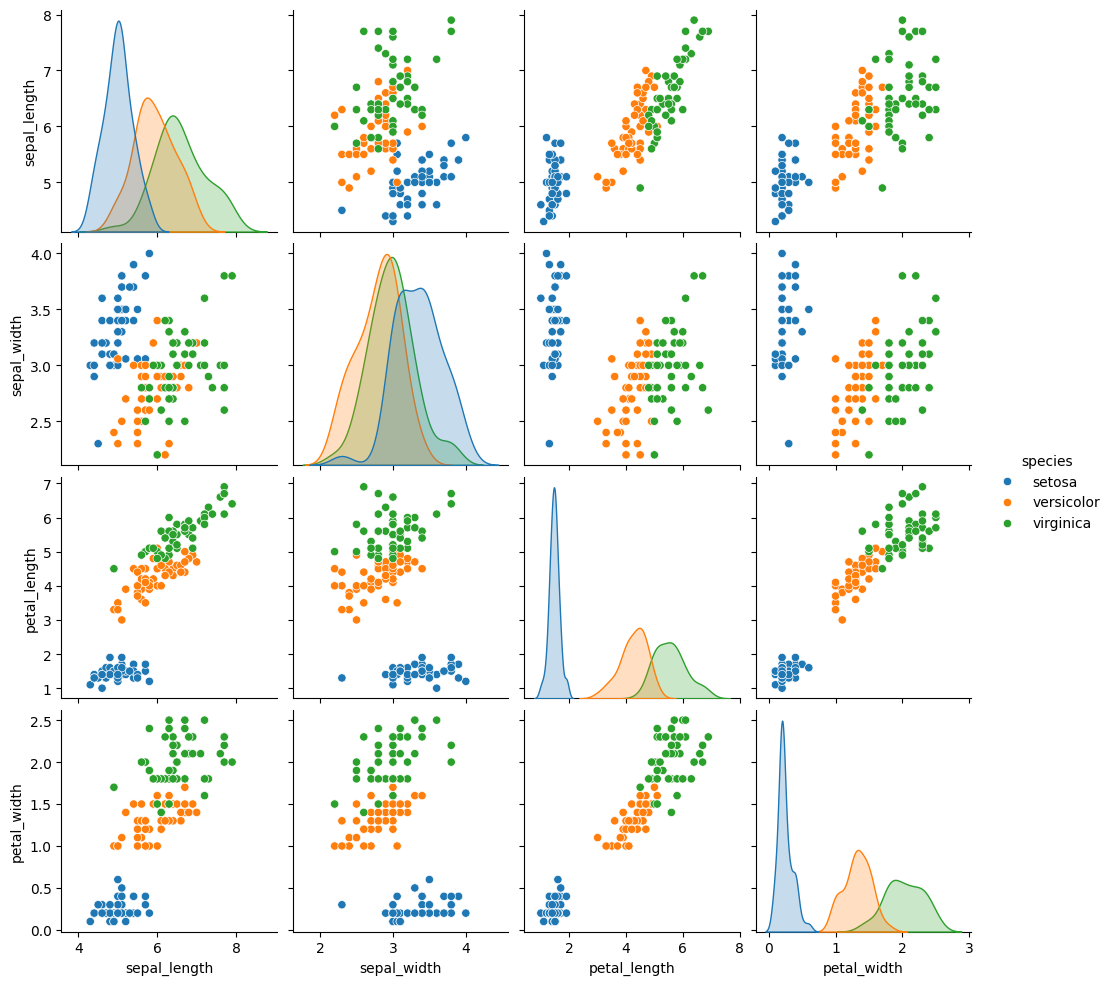

In [20]:
sns.pairplot(data,hue='species')

# First step

importing numpy for calculations and from sklearn we import load_iris which is our dataset and matplotlib for plots

In [21]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [22]:
iris = load_iris()

x, y = iris.data, iris.target

In [23]:
data = np.column_stack((x, y))

np.random.shuffle(data)

In [24]:
x_shuffled, y_shuffled = data[:, :-1], data[:, -1]

# statistic operations and visualizing the distribution

now we try to perform some statistic operations so we better know our data and try to see how we can preproccess our data:

In [25]:
feature_means = np.mean(x, axis=0)
feature_medians = np.median(x, axis=0)
feature_stddevs = np.std(x, axis=0)

In [26]:
print(f"Feature Means:{feature_means}")
print(f"\nFeature Medians:{feature_medians}")
print(f"\nFeature Standard Deviations:{feature_stddevs}")

Feature Means:[5.84333333 3.05733333 3.758      1.19933333]

Feature Medians:[5.8  3.   4.35 1.3 ]

Feature Standard Deviations:[0.82530129 0.43441097 1.75940407 0.75969263]


now we create histograms for each featuret:

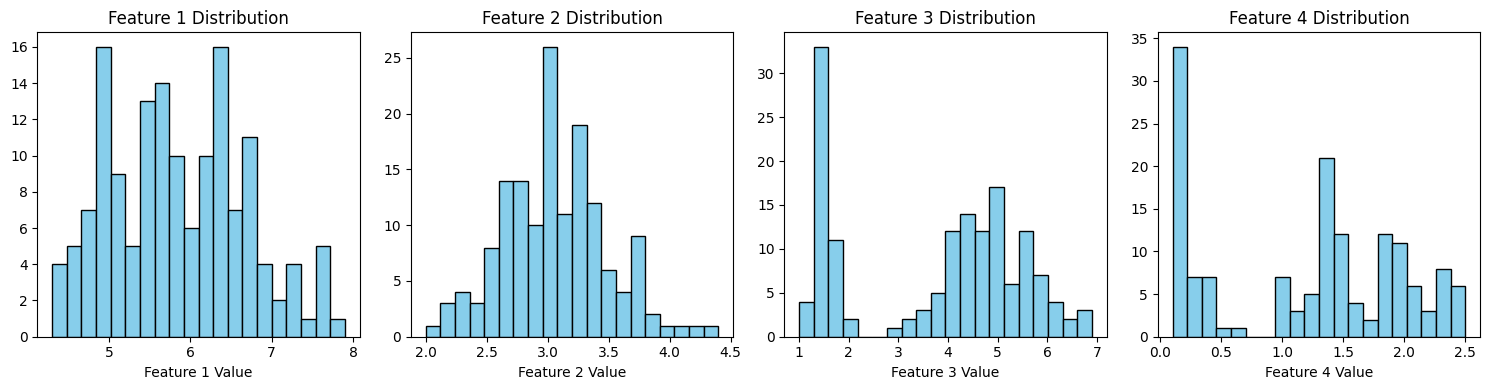

In [27]:
num_features = x.shape[1]
fig, axes = plt.subplots(1, num_features, figsize=(15, 4))

for i in range(num_features):
    axes[i].hist(x[:, i], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Feature {i+1} Distribution")
    axes[i].set_xlabel(f"Feature {i+1} Value")
    # axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Feature 1 Distribution: The values range from around 5 to 8. There is a notable peak at a value slightly above 5, indicating that this specific feature value is most common. The distribution is somewhat bimodal as there’s another smaller peak around a value of 7.

Feature 2 Distribution: Feature values are between approximately 2.0 and 4.5. There’s a prominent peak at around a value of 3.0, making it modal. A red dot appears on top of one bar; however, its significance isn’t clear without additional context.

Feature 3 Distribution: This feature has values distributed between roughly 1 and nearly to up to about just over six. It exhibits a multimodal distribution with two noticeable peaks at around values of just under two and slightly above five.

Feature 4 Distribution: Values for this feature are spread between approximately zero to just over two. There’s an extremely prominent peak at zero indicating that this specific feature value is highly frequent in comparison to others.

These plots are histograms that represent the distribution of each feature in the Iris dataset. The x-axis represents the value of each feature, and the y-axis represents the count or frequency of each value in the dataset. These distributions provide insights into how each feature varies within the Iris dataset, which can be crucial for tasks like clustering, classification or other machine learning applications where understanding data distribution aids in model selection and evaluation.

# corrolation matrix

now we use corrcoef to see the correlation matrix between the features and better decide what features can contribute to the model and help with classification

In [28]:
corr_matrix = np.corrcoef(data, rowvar=False)

print(corr_matrix)

[[ 1.         -0.11756978  0.87175378  0.81794113  0.78256123]
 [-0.11756978  1.         -0.4284401  -0.36612593 -0.42665756]
 [ 0.87175378 -0.4284401   1.          0.96286543  0.9490347 ]
 [ 0.81794113 -0.36612593  0.96286543  1.          0.95654733]
 [ 0.78256123 -0.42665756  0.9490347   0.95654733  1.        ]]


# box plot

we plot the box plot for each feature to find out if there are any outliers or noises that we have to handle

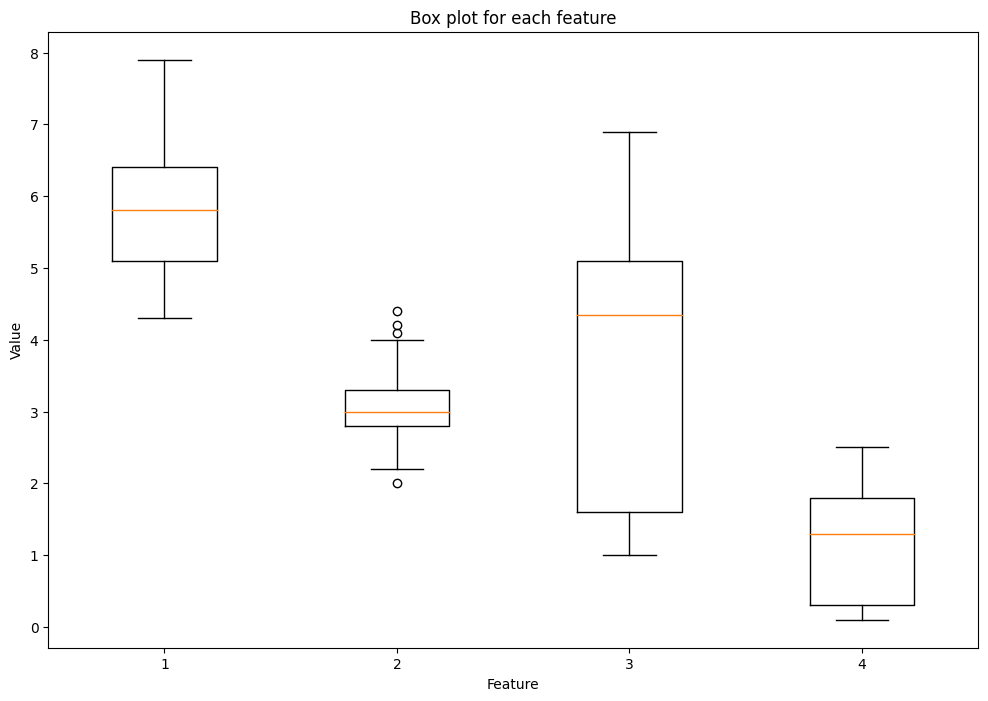

In [29]:
plt.figure(figsize=(12, 8))
plt.boxplot(x_shuffled)
plt.title('Box plot for each feature')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

Feature 1: The bottom line of the box is around value 5, indicating the first quartile (Q1). The orange line within the box is near value 6, representing the median. The top line of the box is close to value 7, indicating the third quartile (Q3). There are no outliers depicted.

Feature 2: The bottom line of this smaller box is just above value 2, indicating Q1. The orange median line is around value 3. The top line lies slightly below value 4, marking Q3. Outliers are present above and below this feature’s interquartile range (IQR).

Feature 3: This larger box has its bottom at approximately value 1, marking Q1. The median is indicated by an orange line at about value 6. Q3 is represented by a top border close to value 8. No outliers are shown for this feature.

Feature 4: This smaller box begins just above zero (Q1). An orange median line lies near a value of about one and a half. It ends slightly below two (Q3), with no depicted outliers.

Box plots provide a visual summary of the data distribution through their quartiles. Here are the components of a box plot:

Bottom line of the box (Q1): This is the first quartile, or the 25th percentile. 25% of the observations fall below this value.

Orange line within the box (Median): This is the median, or the 50th percentile. 50% of the observations fall below this value.

Top line of the box (Q3): This is the third quartile, or the 75th percentile. 75% of the observations fall below this value.

Outliers: These are data points that fall below Q1 - 1.5IQR or above Q3 + 1.5IQR.

# Preprocessing

at first we use a method called zscore to find the outliers , we can decide then what to do with them and how to handle them properly

In [30]:
from scipy.stats import zscore

In [31]:
z_scores = np.abs(zscore(x_shuffled))
threshold = 3
outliers = np.where(z_scores > threshold)

In [32]:
print(f"Outlier rows: {outliers[0]}")

Outlier rows: [2]


there was only one outlier in the data , so there wont be a need for dropping it

now for the preprocessing we use Standardization (Z-score normalization), this method Transform data to have a mean of 0 and a standard deviation of 1.note that if we only Standardize the test data , we have to do this on our test data too if we want to get the best results

In [33]:
x_standardized = (x_shuffled - feature_means) / feature_stddevs

the variables we will be using in the folds are x_standardized, and the corresponding y_shuffle

# NAIVE BAYES

we start making our classifier using only numpy, the method we want to use is, Naive Bayes , aka Gaussian Naive Bayes, aka GNB or NB:

first we make the function that uses the train data to train the model:

In [34]:
def fit(x, y):
    n_samples, n_features = x.shape
    classes = np.unique(y)
    n_classes = len(classes)

    mean = np.zeros((n_classes, n_features), dtype=np.float64)
    var = np.zeros((n_classes, n_features), dtype=np.float64)
    prior = np.zeros(n_classes, dtype=np.float64)

    for i, c in enumerate(classes):
        x_c = x[y == c]
        mean[i, :] = np.mean(x_c, axis=0)
        var[i, :] = np.var(x_c, axis=0)
        prior[i] = x_c.shape[0] / float(n_samples)

    return mean, var, prior

then we make another function to predict the test data Classes and gives it back :

In [35]:
def predict(x, mean, var, prior):
    n_samples, n_features = x.shape
    n_classes = len(prior)
    log_posterior = np.zeros((n_samples, n_classes))

    for i in range(n_classes):
        log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * var[i]) + ((x - mean[i]) ** 2) / var[i], axis=1)
        log_posterior[:, i] = log_likelihood + np.log(prior[i])

    return np.argmax(log_posterior, axis=1)

now we make a function does the method of folding for this classifier manually, here we put the number of fold as 5

the cross_validate function performs k-fold cross-validation for a Naive Bayes classifier. It divides the data into training and validation sets, trains the model, and computes the average accuracy across all folds. This helps assess the model’s performance and generalization ability.

# Cross Validation and related plots

In [36]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [37]:
from sklearn.metrics import confusion_matrix

def cross_validate(x, y, num_folds=5):
    n_samples = len(x)
    fold_size = n_samples // num_folds
    accuracies = []

    for i in range(num_folds):
        start_idx = i * fold_size
        end_idx = (i + 1) * fold_size

        x_train = np.concatenate([x[:start_idx], x[end_idx:]])
        y_train = np.concatenate([y[:start_idx], y[end_idx:]])
        x_val = x[start_idx:end_idx]
        y_val = y[start_idx:end_idx]

        mean, var, prior = fit(x_train, y_train)
        y_pred = predict(x_val, mean, var, prior)

        accuracy = np.mean(y_pred == y_val)
        accuracies.append(accuracy)

        print(f"Accuracy of fold {i+1}: {accuracy:.2f}")

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        print(f"Confusion matrix for fold {i+1}:\n", cm)

        # Classification report
        report = classification_report(y_val, y_pred)
        print(f"Classification report for fold {i+1}:\n", report)

        df = pd.DataFrame(x_val)
        df['y_pred'] = y_pred

        sns.pairplot(df, hue='y_pred')
        plt.title(f'Pair plot for fold {i+1}')
        plt.show()

    avg_accuracy = np.mean(accuracies)
    print(f"Average accuracy across {num_folds} folds: {avg_accuracy:.2f}")

    plt.figure(figsize=(10, 6))
    colors = ['b', 'g', 'r', 'k', 'm', 'y', 'c']  # List of colors
    plt.bar(range(1, num_folds+1), accuracies, color=colors[:num_folds])
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('Cross-validation Accuracy per Fold')
    plt.xticks(range(1, num_folds+1))
    plt.show()

    return avg_accuracy

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [39]:
def feature_importance(x, y, num_folds=5):
    n_samples = len(x)
    fold_size = n_samples // num_folds
    n_features = x.shape[1]
    all_accuracies = []

    for n in range(n_features, 0, -1):
        accuracies = []
        for i in range(num_folds):
            start_idx = i * fold_size
            end_idx = (i + 1) * fold_size

            x_train = np.concatenate([x[:start_idx], x[end_idx:]])
            y_train = np.concatenate([y[:start_idx], y[end_idx:]])
            x_val = x[start_idx:end_idx]
            y_val = y[start_idx:end_idx]

            model = LogisticRegression()
            rfe = RFE(model, n_features_to_select=n)
            fit = rfe.fit(x_train, y_train)
            y_pred = fit.predict(x_val)

            accuracy = np.mean(y_pred == y_val)
            accuracies.append(accuracy)

        all_accuracies.append(accuracies)

    # Plotting
    plt.figure(figsize=(10, 6))
    for i in range(n_features):
        plt.plot(range(1, num_folds+1), all_accuracies[i], label=f'{n_features-i} features')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('Cross-validation Accuracy per Fold with Different Number of Features')
    plt.legend()
    plt.show()

we also coded our function, to plot the pairplot of validation data in each fold and plot the barplot for accuracies

# Naive Bayes Results

Accuracy of fold 1: 0.97
Confusion matrix for fold 1:
 [[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]
Classification report for fold 1:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      0.90      0.95        10
         2.0       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



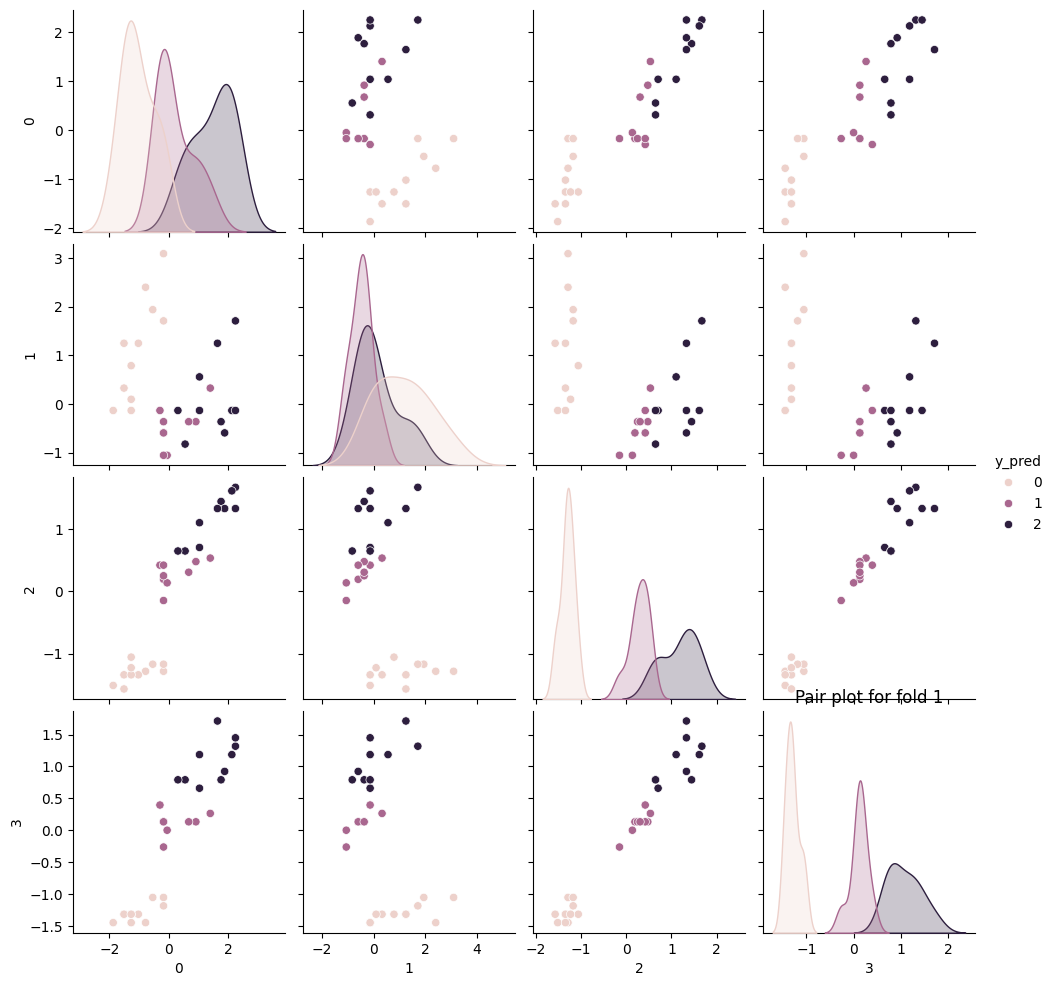

Accuracy of fold 2: 0.97
Confusion matrix for fold 2:
 [[ 7  0  0]
 [ 0  6  1]
 [ 0  0 16]]
Classification report for fold 2:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      0.86      0.92         7
         2.0       0.94      1.00      0.97        16

    accuracy                           0.97        30
   macro avg       0.98      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



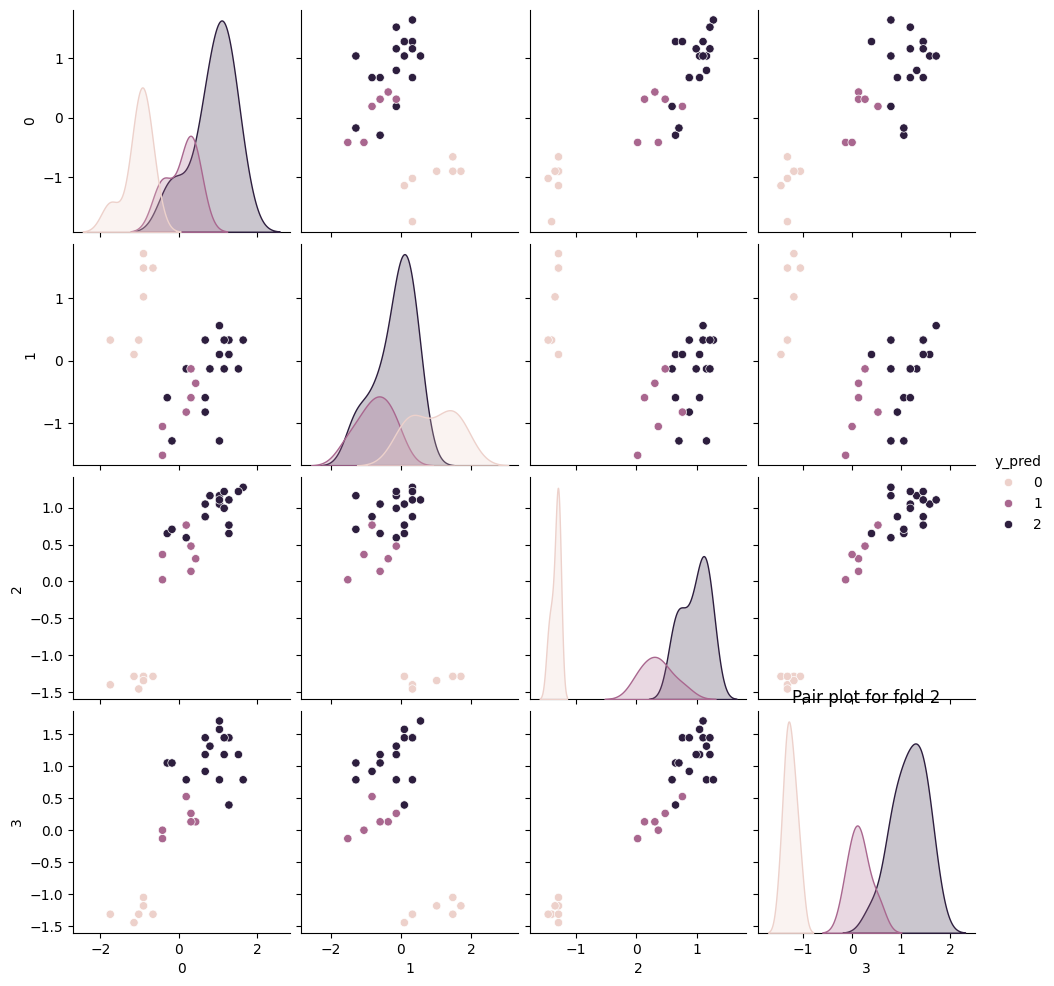

Accuracy of fold 3: 0.93
Confusion matrix for fold 3:
 [[10  0  0]
 [ 0  7  1]
 [ 0  1 11]]
Classification report for fold 3:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.88      0.88      0.88         8
         2.0       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



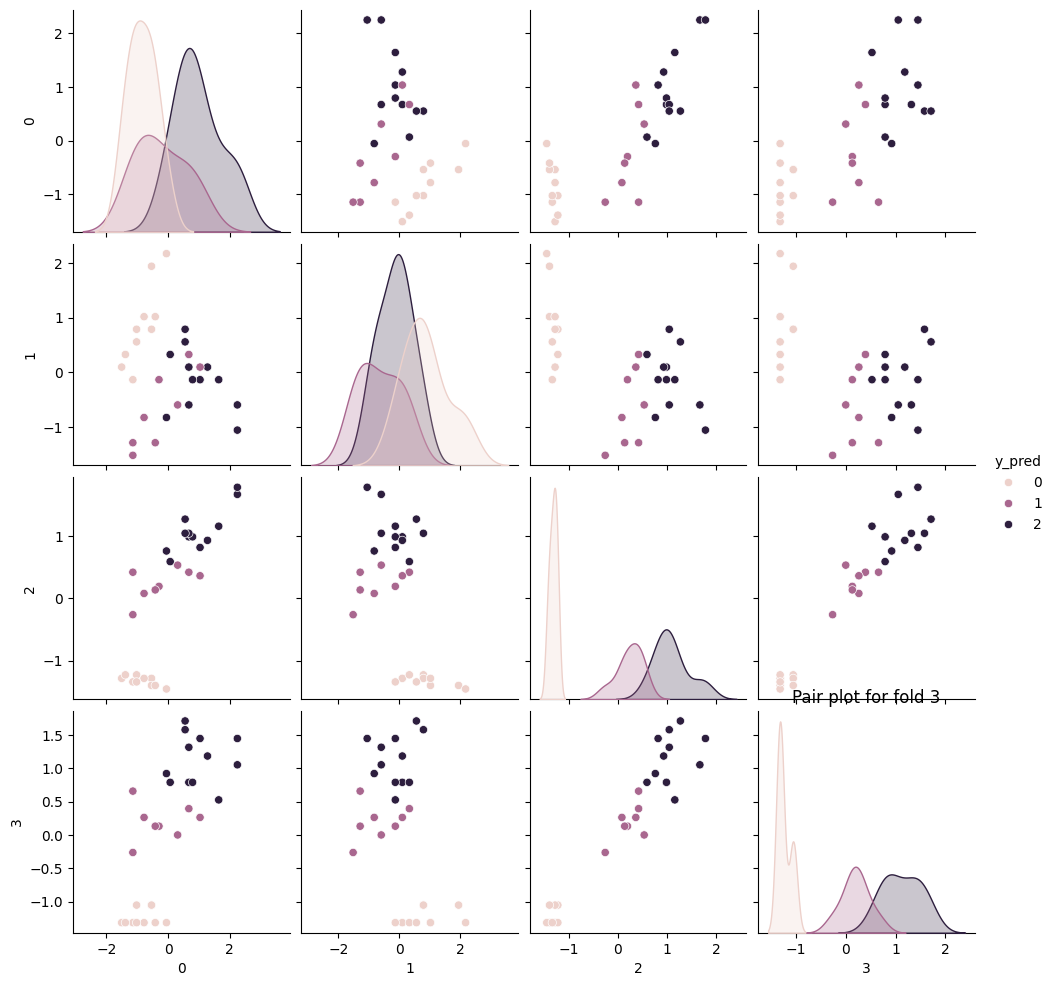

Accuracy of fold 4: 0.93
Confusion matrix for fold 4:
 [[11  0  0]
 [ 0 13  0]
 [ 0  2  4]]
Classification report for fold 4:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       0.87      1.00      0.93        13
         2.0       1.00      0.67      0.80         6

    accuracy                           0.93        30
   macro avg       0.96      0.89      0.91        30
weighted avg       0.94      0.93      0.93        30



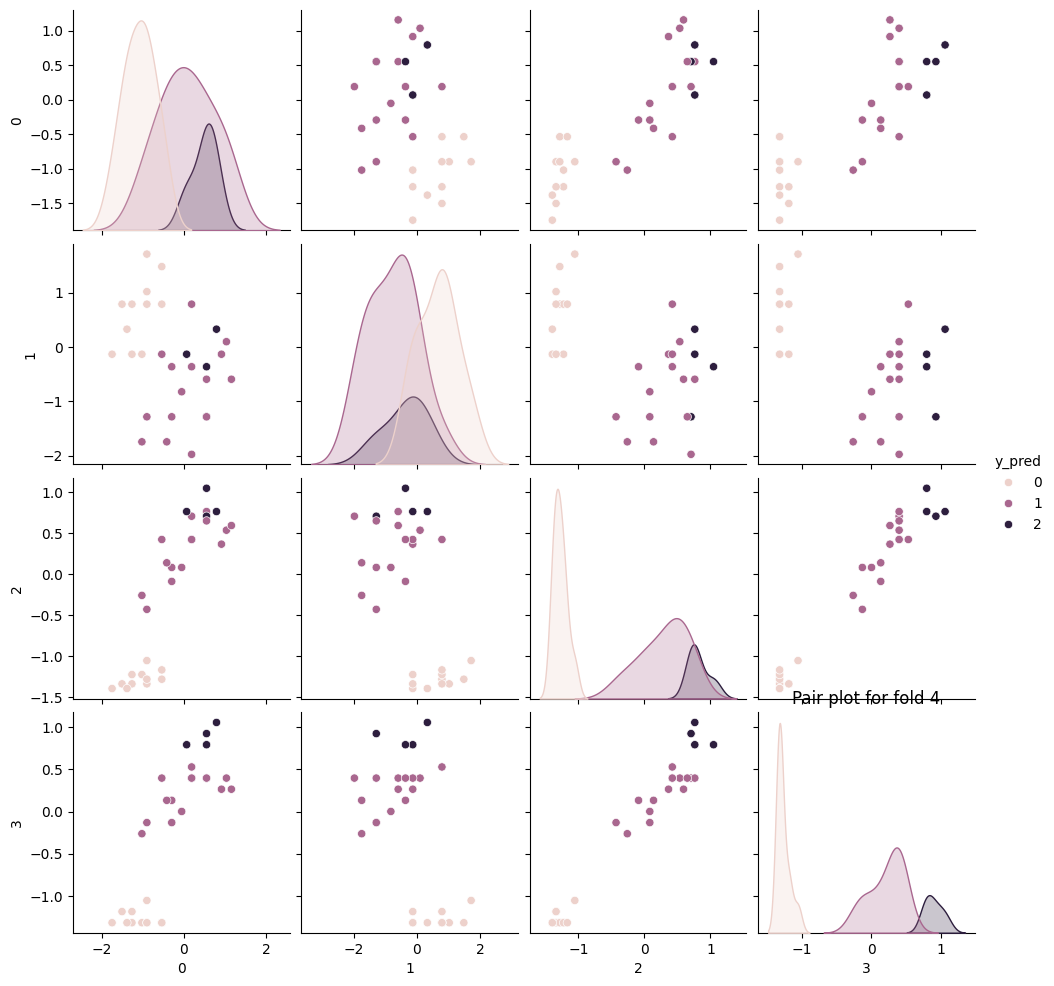

Accuracy of fold 5: 0.97
Confusion matrix for fold 5:
 [[11  0  0]
 [ 0 12  0]
 [ 0  1  6]]
Classification report for fold 5:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       0.92      1.00      0.96        12
         2.0       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



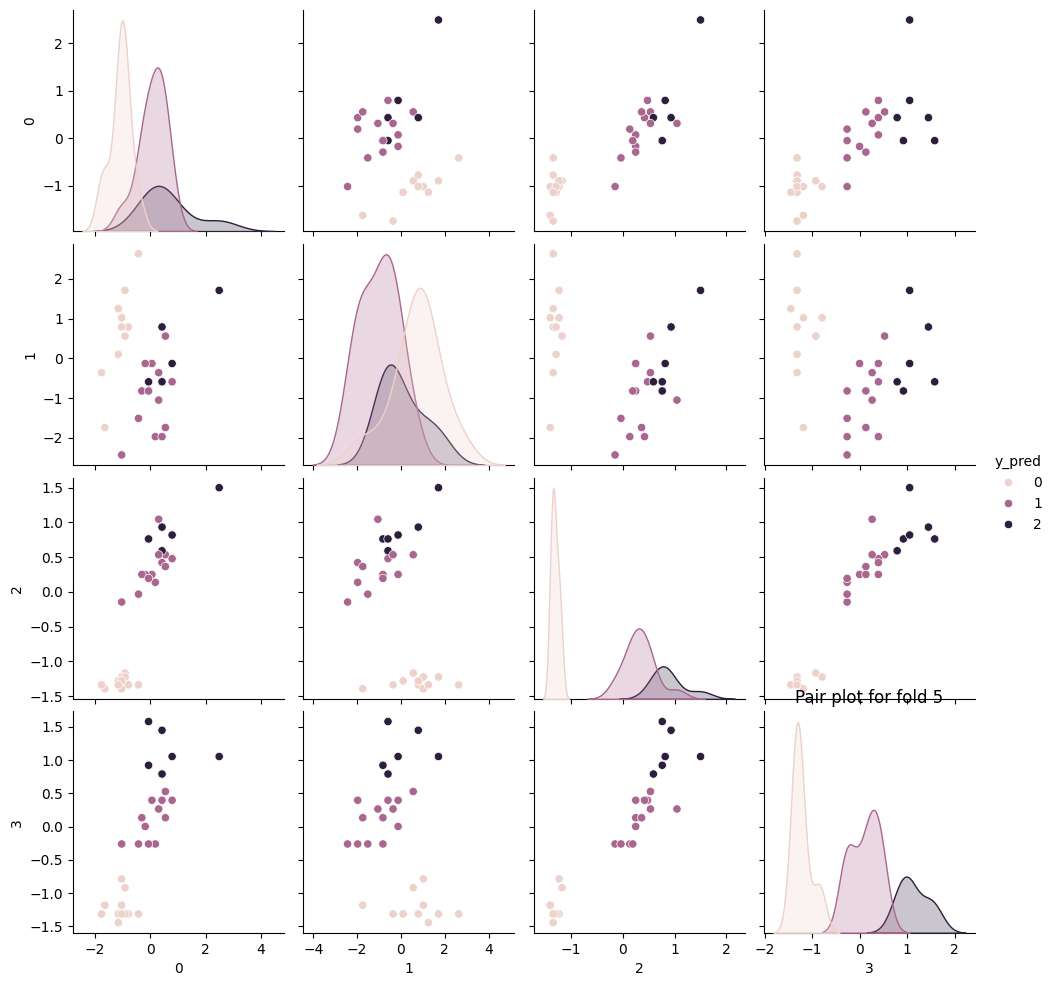

Average accuracy across 5 folds: 0.95


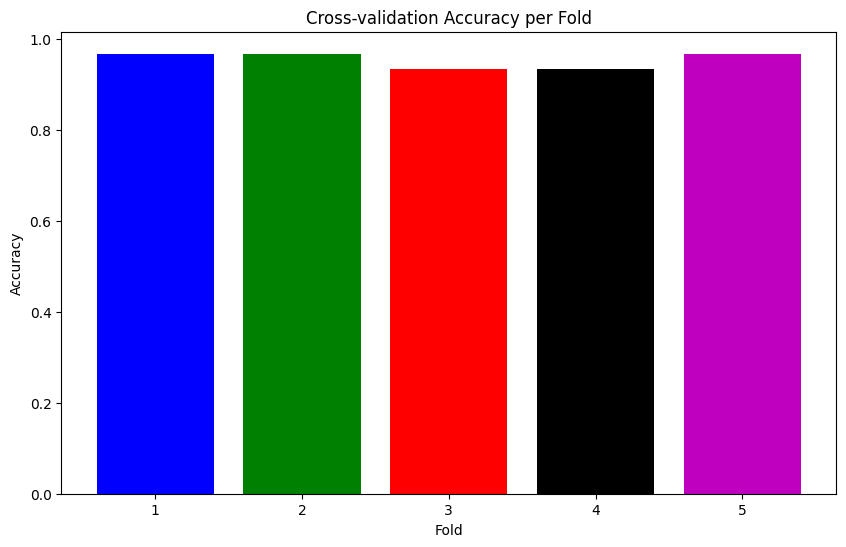

Average accuracy across 5 folds: 0.95


In [40]:
avg_accuracy = cross_validate(x_standardized, y_shuffled, num_folds=5)
print(f"Average accuracy across 5 folds: {avg_accuracy:.2f}")

although we shuffled our data , there can be some class or data concentrated in one split of the data, for that reason the accuracy of a specific fold can be less than others and effect the average accuracy, but when we do cross validation, it helps us see the true accuracy of our model

The difference in accuracy between the two folds can be attributed to the distribution and characteristics of the data in each fold. Let’s break down what happened:

Fold 5 (Accuracy: 0.97): The confusion matrix shows that the model made very few mistakes. It perfectly classified all instances of class 0.0 and class 1.0. It made a single mistake with class 2.0, where it misclassified one instance as class 1.0. This led to a high accuracy of 0.97.

Fold 2 (Accuracy: 0.83): The confusion matrix shows more misclassifications compared to Fold 5. While it perfectly classified all instances of class 0.0, it misclassified 3 instances of class 1.0 as class 2.0 and 2 instances of class 2.0 as class 1.0. This led to a lower accuracy of 0.83.

The difference in accuracy between the two folds could be due to several reasons:

Variability in the Data: Each fold contains a different subset of the data. The instances in Fold 5 may have been easier for the model to classify correctly compared to those in Fold 2.

Imbalance in the Classes: If there’s an imbalance in the number of instances for each class in the folds, the model may perform better on the majority class and worse on the minority class.

Noise and Outliers: If Fold 2 contains more noisy instances or outliers, it could lead to more misclassifications and hence lower accuracy.

Remember, it’s normal for model performance to vary across different folds in cross-validation due to the reasons above. The average accuracy across all folds gives a better indication of the model’s overall performance.

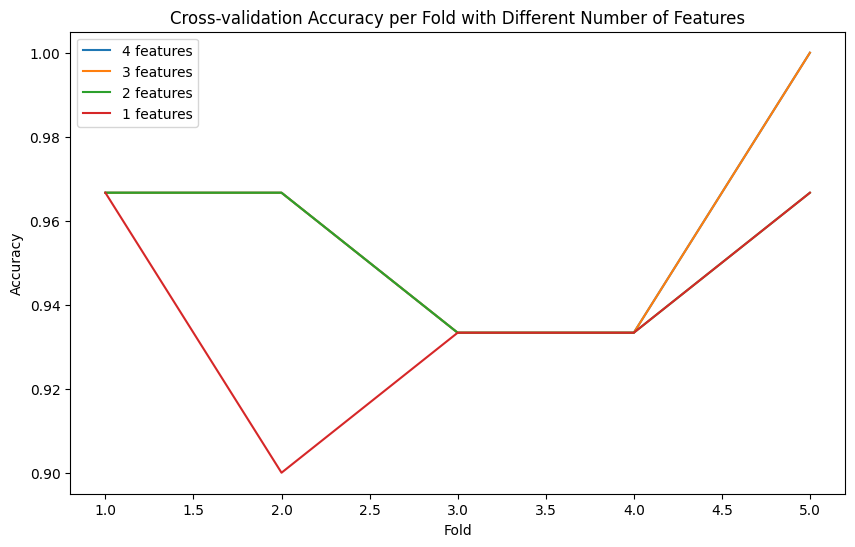

In [41]:
feature_importance(x_standardized, y_shuffled, num_folds=5)

we get different amounts each time because we shuffle our data randomly each time, but all the averages are above 0.95

The trend you’re seeing is a common phenomenon in machine learning known as the bias-variance tradeoff. Here’s a brief explanation:

High Bias (Underfitting): When you use fewer features, your model is simpler and may not capture all the complexities in the data, leading to errors due to high bias. This is known as underfitting.

High Variance (Overfitting): As you add more features, your model becomes more complex and can capture more details in the data. However, it might also start capturing noise and outliers, leading to errors due to high variance. This is known as overfitting.

Optimal Point: There’s usually an optimal point where the model has just the right number of features to balance bias and variance, leading to the best predictive performance. This seems to be the peak point in your plot.

In our case, as you remove the least important features one by one, the model initially becomes better at generalizing because it’s less likely to overfit to the noise in the data. That’s why the accuracy increases. However, after a certain point, removing more features makes the model too simple to capture the necessary details in the data, leading to underfitting and a drop in accuracy.

Remember, the optimal number of features depends on the specific dataset and model. It’s always a good idea to experiment with different numbers of features and use techniques like cross-validation to find the best model

**SO WE CAN SAY** :

in this dataset because there are not many rows of data and not many features we mostly have the same number for average accuracies of each time we do the cross validation, although the result for the last fold of the validation with 3 features , we got the worst accuracy for the second fold of that same validation, but we should also know that many of these results are only limited to naive bayes method and the the attributes and likelihoods that are the heart of the method

# K NEAREST NEIGHBOR (KNN)

now we want to use another very useful classifier called KNN, this method, in the way we used it here, uses the euclidean distance to find a number of neighbors we set ourselves as k , and set a label based on those Neighbors

first we make a function that can calculate the euclidean distance:

In [42]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

then we make the KNN function itself:

In [43]:
def k_nearest_neighbors(x_train, y_train, x_test, k):
    y_pred = []
    for test_point in x_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in x_train]
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = y_train[nearest_indices]
        y_pred.append(np.bincount(nearest_labels).argmax())
    return np.array(y_pred)

for testing this method , we better use splitted data so we can get the accuracy for each number of k

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_standardized, y_shuffled, test_size=0.3, random_state=42)

In [46]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

we want to test different amounts of k, so we need to use a for loop, we can surely get better results when we try different values for k, remember that knn takes a long time to proccess

In [47]:
k_values = np.arange(3, 10)
accuracies = []

for k in k_values:
    y_pred = k_nearest_neighbors(x_train, y_train, x_test, k)
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

then we use plot to see the best k:

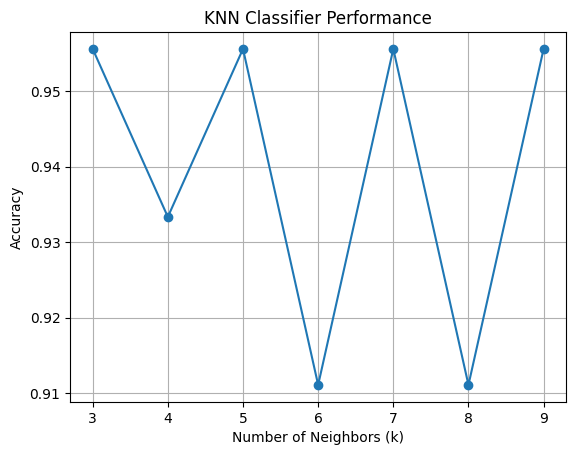

In [48]:
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Performance')
plt.grid(True)
plt.show()

In KNN, the classification of a new instance is determined by the majority vote of its ‘k’ nearest neighbors. The choice of ‘k’ is crucial:

Odd vs Even k: When k is an even number (like 6), there’s a chance of a tie vote among the neighbors, which can lead to arbitrary decisions and potentially lower accuracy. This might explain the dip at k=6 in your plot. On the other hand, when k is an odd number (like 7), ties are less likely, which can lead to more consistent and accurate predictions.

Bias-Variance Tradeoff: Just like in your previous question, there’s a bias-variance tradeoff in choosing ‘k’. A small ‘k’ means that noise will have a higher influence on the result, and a large ‘k’ makes it computationally expensive and might include points from other classes.

Optimal k: The optimal k is usually selected by cross-validation, where the model is trained and validated on different subsets of the data for different values of k, and the k with the highest validation accuracy is chosen. In your case, k=7 resulted in the highest cross-validation accuracy, so it was the best choice for this particular dataset.

# Support Vector Machine (SVM)

A support vector machine (SVM) is a machine learning algorithm that uses supervised learning models to solve complex classification, regression, and outlier detection problems by performing optimal data transformations that determine boundaries between data points based on predefined classes, labels, or outputs. SVMs are widely adopted across disciplines such as healthcare, natural language processing, signal processing applications, and speech & image recognition fields.

Technically, the primary objective of the SVM algorithm is to identify a hyperplane that distinguishably segregates the data points of different classes. The hyperplane is localized in such a manner that the largest margin separates the classes under consideration.

Here we want to use SVM for classification purposes, we use as a method that trains from data and seeing how classes are laid out , and then predict the correct class accordingly

We use different libraries to run the svm and then use GridSearchCV to tune the parameters of our SVM as well as choose the kernel that gives back the best result, in order to do that we made some a class with specific functions to use on iris data to find the best SVM classification result

In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

here are the parameters we want to test in order to find the best combination of parameters using the accuracy score

In [50]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly']}

now we get the gridsearch going

In [51]:
svm = SVC()
grid = GridSearchCV(svm, param_grid, refit=True, verbose=3)

we fit the gridsearch on our training data so we get the best parameters to use on this dataset and method

In [52]:
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.952 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.952 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.905 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.905 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

In SVM, the C parameter is the penalty parameter of the error term. It controls the trade-off between margin maximization and classification error. A larger C gives more weight to misclassified data points, while a smaller C gives more weight to maximizing the margin.

The gamma parameter defines how much influence a single training example has. The larger the gamma, the closer other data points must be to influence the decision boundary.

The kernel parameter defines the type of kernel function to use in the SVM. The 'linear' kernel function is the simplest and the default. It is used to find a linear decision boundary.

In [53]:
svm = SVC(C=10, gamma=1, kernel='linear', verbose=True)

In [54]:
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
print('report for SVM:\n', classification_report(y_test, y_pred_svm))

[LibSVM]report for SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



The classification report shows that the model achieved a high precision, recall, and F1-score for all three classes, indicating that it was able to accurately classify the majority of the samples. The overall accuracy of the model is 0.93, which means that it correctly classified 93% of the samples.

The 'macro avg' and 'weighted avg' lines in the classification report show the average precision, recall, and F1-score across all classes. The 'macro avg' calculates the average without considering the class imbalance, while the 'weighted avg' takes into account the number of samples in each class. Both averages are high, indicating that the model performed well across all classes.

In summary, the selected parameters C=10, gamma=1, and kernel='linear' resulted in a well-performing SVM model for the Iris dataset. The high precision, recall, and F1-score for all classes and the high overall accuracy indicate that the model was able to accurately classify the majority of the samples.

now lets draw a pairplot for the test data that we have

In [55]:
df = pd.DataFrame(x_test)
df['predlabel'] = y_pred_svm

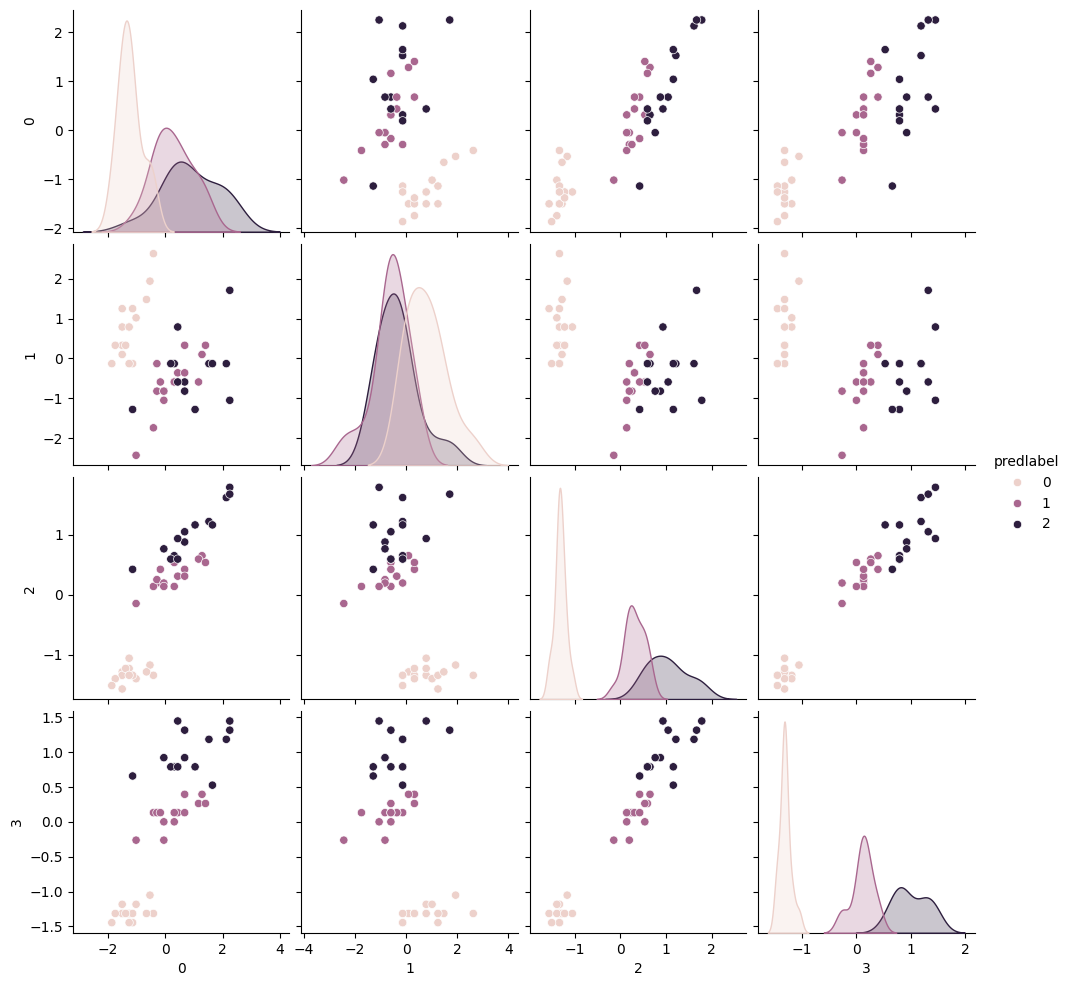

In [56]:
sns.pairplot(df, hue='predlabel')

now we do the Kfold on the dataset to find the actual average accuracy, but in order to see the plots and being able to really understand whats goig on, we have to use only two features of this dataset, as we know we cant do a 2D plot using more than 2 features

In [57]:
from sklearn.model_selection import KFold

we load Iris again

In [58]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

Initialize the KFold class with the number of folds we want

In [59]:
kf = KFold(n_splits=5, shuffle=True)

Initialize a list to store the accuracies for each fold and a counter

In [60]:
fold_accuracies = []

fold_counter = 1

Fold 1...
[LibSVM]Number of support vectors: [1 7 6]


<ipython-input-61-3445329078b7>:22: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(xx, yy, Z, alpha=0.5, color='red')


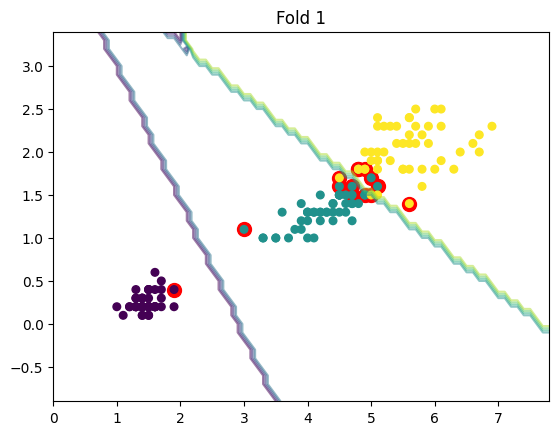

[0.9666666666666667]
Fold 2...
[LibSVM]Number of support vectors: [1 8 8]


<ipython-input-61-3445329078b7>:22: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(xx, yy, Z, alpha=0.5, color='red')


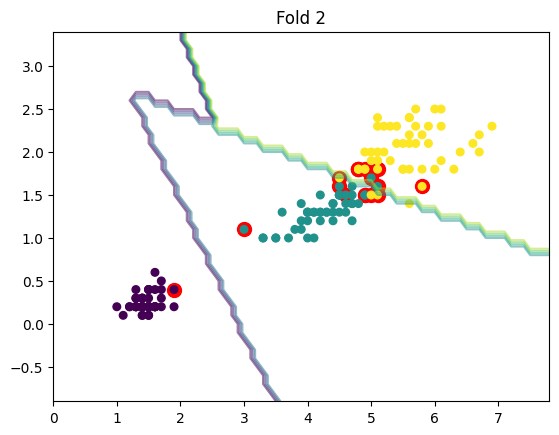

[0.9666666666666667, 0.9666666666666667]
Fold 3...
[LibSVM]Number of support vectors: [2 7 7]


<ipython-input-61-3445329078b7>:22: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(xx, yy, Z, alpha=0.5, color='red')


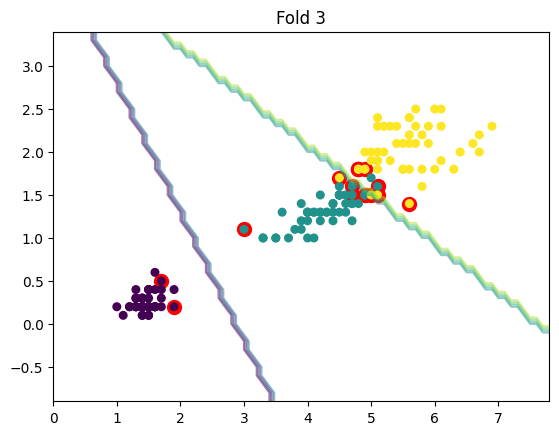

[0.9666666666666667, 0.9666666666666667, 0.9666666666666667]
Fold 4...
[LibSVM]Number of support vectors: [1 7 6]


<ipython-input-61-3445329078b7>:22: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(xx, yy, Z, alpha=0.5, color='red')


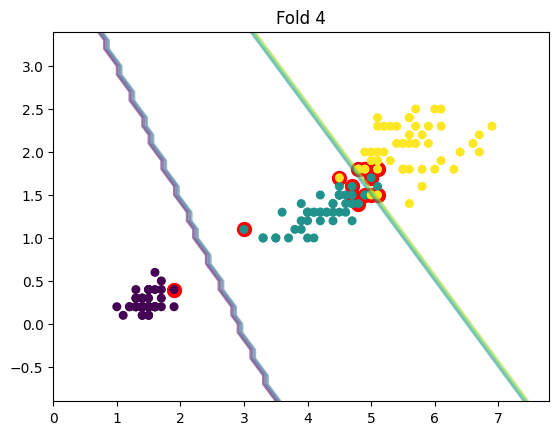

[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]
Fold 5...
[LibSVM]Number of support vectors: [1 7 6]


<ipython-input-61-3445329078b7>:22: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(xx, yy, Z, alpha=0.5, color='red')


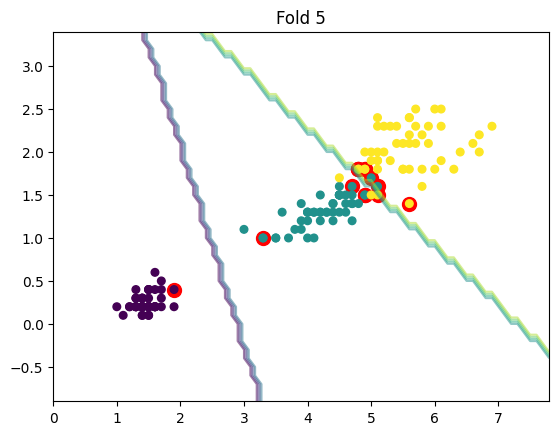

[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333]


In [61]:
for train_index, test_index in kf.split(X):
    print(f"Fold {fold_counter}...")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model on the current fold's training data
    svm = SVC(C=10, gamma=1, kernel='linear', verbose=True)
    svm.fit(X_train, y_train)

    # Print the number of support vectors
    print(f"Number of support vectors: {svm.n_support_}")

    # Plot the decision boundary and support vectors for this fold
    plt.figure()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    y_pred = svm.predict(X_grid)
    Z = y_pred.reshape(xx.shape)
    plt.contour(xx, yy, Z, alpha=0.5, color='red')
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], c='red', s=100)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis')
    plt.title(f"Fold {fold_counter}")
    plt.show()

    # Calculate the accuracy for this fold
    fold_accuracy = svm.score(X_test, y_test)
    fold_accuracies.append(fold_accuracy)

    fold_counter += 1
    print(fold_accuracies)

Print the average accuracy across all folds

In [62]:
print(f"Average accuracy: {np.mean(fold_accuracies)}")

Average accuracy: 0.96


let's go over what happend in this code one more time

Support Vector Machine (SVM): SVM is a supervised machine learning algorithm used for classification or regression problems. It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.
Folds: In cross-validation, the data is divided into ‘k’ subsets, or ‘folds’. Each fold is used once as a validation set, while the remaining folds form a training set. The image shows the results of the 4th and 5th folds.
Scatter Plots: Each plot shows a scatter plot with data points colored differently according to their class. In “Fold 4”, there are three distinct clusters of data points while in “Fold 5” there are only two visible clusters.
Decision Boundary: The red line in each plot is the decision boundary created by the SVM. This line separates the classes. The goal of SVM is to find the optimal decision boundary that maximizes the margin between different classes.
Support Vectors: Support vectors are the data points that lie closest to the decision boundary. The number of support vectors for each fold is displayed at the top left corner of each plot. For both folds, the number of support vectors is 17.
Warnings: The warnings above each plot indicate that some keywords were not used by contour ‘color’. This could be due to a mismatch between the parameters provided and those expected by the contour function in the matplotlib library.

in the end we can see that our SVM did quite well according to the decision boundary it has chosen and is shown in the plots related to the folds, as you can see there are some data that is chosen and is shown as red, these red data are what our SVM use to find the boundary and predict each test data and give the correct class, in fact our model did so well , that we got the same average accuracy with only 2 features as we did with 4 and without Kfold

# CLUSTERIN:


Clustering is a fundamental unsupervised machine learning technique used to identify patterns and relationships in data. It involves grouping similar data points together based on their features, without the need for labeled data. The goal of clustering is to partition the data into distinct groups, where each group represents a cluster of similar data points. This technique has numerous applications in various fields, including image processing, text mining, and bioinformatics.

In the context of the Iris dataset, clustering can be used to identify distinct groups of iris flowers based on their sepal and petal measurements. The Iris dataset contains 150 samples, each with four features: sepal length, sepal width, petal length, and petal width. These features can be used to cluster the data and identify distinct groups of iris flowers.

In [63]:
import warnings
warnings.filterwarnings('ignore')

# Kmeans

First of all we import the libraries we need to use including numpy and pandas for array handling, matplotlib and seaborn for data visualization, we use scikit library to import the required dataset, clustering method which is KMeans and the score used to determine how well the clustering was done.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

At a high level, k-means is an unsupervised machine learning algorithm used for data clustering. The goal of k-means is to partition a dataset into k distinct, non-overlapping clusters, where each data point belongs to the cluster with the nearest mean. The algorithm iteratively assigns data points to clusters and updates the cluster means until convergence is achieved.

Here's a step-by-step breakdown of how the k-means algorithm works:

Initialization: The algorithm begins by randomly initializing k cluster centroids, where k is a user-defined parameter. Each centroid is a vector in the same space as the input data.

Assignment: In the first iteration, the algorithm assigns each data point to the nearest centroid based on Euclidean distance. This creates k clusters, where each cluster is defined by its set of member data points and its centroid.

Update: After all data points have been assigned to clusters, the algorithm updates the centroids by computing the mean of all data points in each cluster. This creates new centroids that better represent the clusters.

Iteration: The algorithm repeats steps 2 and 3, re-assigning data points to the nearest centroid and updating the centroids, until convergence is achieved. Convergence is typically defined as when the cluster assignments no longer change or when the change in centroid values falls below a pre-defined threshold.

we load our dataset into a variable and extract the features. We don't need the labels here because we are using the dataset fo clustering which is an unsupervised method. Then we turn our data into a Dataframe.

By converting the input data to a DataFrame, it becomes easier to manipulate and visualize the data using pandas and other libraries. For example, you can use the head() method to view the first few rows of the DataFrame, or the describe() method to view summary statistics for each feature. You can also use the plot() method to visualize the distribution of each feature or the relationships between features.

In [65]:
iris = load_iris()
x = iris.data
df = pd.DataFrame(x)
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Pairplot is a visualization tool in Seaborn library that creates a grid of scatter plots for each pair of features in a dataset. It is particularly useful for exploring the relationships between different variables in a dataset and identifying potential clusters or patterns.

In the context of the Iris dataset, a pairplot can help us visualize the relationships between the four features (sepal length, sepal width, petal length, and petal width) and identify any clusters or patterns that may exist. Here's an example code for creating a pairplot for the Iris dataset:

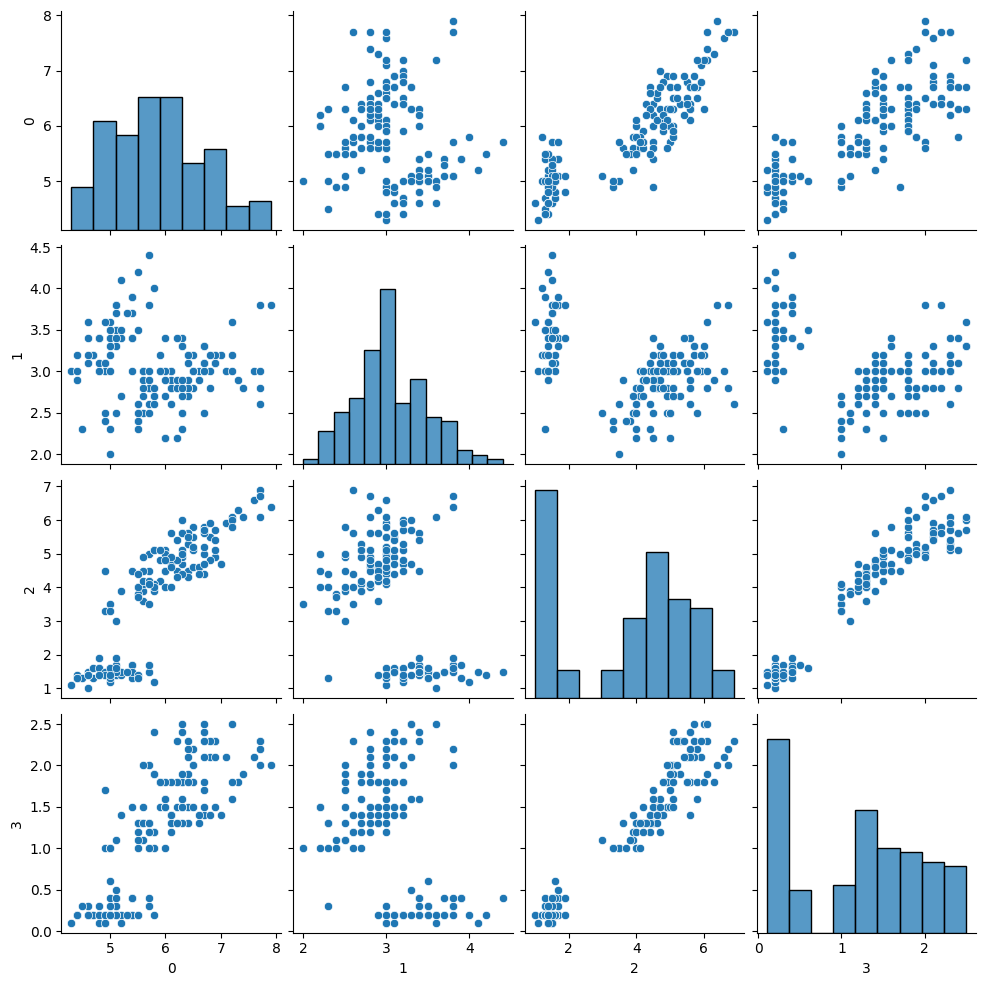

In [66]:
sns.pairplot(df)

One important consideration when using k-means is the choice of k. A small value of k may result in underfitting, where the clusters are too broad and fail to capture important patterns in the data. A large value of k may result in overfitting, where the clusters are too narrow and fail to generalize to new data.

To choose an appropriate value of k, it's common to run the k-means algorithm with different values of k and evaluate the results using metrics such as inertia, silhouette score, or elbow method. Inertia is a measure of the compactness of the clusters, where a lower value indicates tighter clusters. The silhouette score is a measure of the separation between clusters, where a higher value indicates well-separated clusters. The elbow method involves plotting the inertia as a function of k and looking for a "knee" or "elbow" in the plot, which indicates the point where adding more clusters no longer significantly reduces the inertia.

Our code here calculates the inertia of KMeans clustering for different numbers of clusters and plots the result. Here's a breakdown of what each part of the code does:

y=[]: This line initializes an empty list named y that will be used to store the inertia values for each number of clusters.
for k in np.arange(1, 11):: This line starts a loop that will iterate over the numbers 1 to 10 (inclusive) using the np.arange() function to generate a NumPy array of those numbers.
kmn = KMeans(n_clusters=k): This line creates a new KMeans object with k clusters.
kmn.fit(df): This line fits the KMeans object to the data in the df DataFrame. This means that the KMeans algorithm will be run on the data to determine the cluster assignments for each data point.
y.append(kmn.inertia_): This line appends the inertia value of the current KMeans object to the y list. The inertia is a measure of how well the KMeans algorithm has clustered the data, with lower values indicating better clustering.
plt.plot(np.arange(1, 11), y, 'o-'): This line creates a plot of the inertia values for each number of clusters. The np.arange(1, 11) function generates an array of numbers from 1 to 10, which are used for the x-axis values. The y list contains the inertia values for each number of clusters, which are used for the y-axis values. The 'o-' argument specifies that the plot should use circles for the data points and a solid line to connect them.
plt.xlabel('number of clusters') and plt.ylabel('inertia'): These lines add labels to the x-axis and y-axis of the plot, respectively.
plt.show(): This line displays the plot.
Overall, this code is useful for determining the optimal number of clusters for a given dataset using the elbow method, which involves looking for a "knee" in the plot of inertia values where the rate of decrease starts to level off. The optimal number of clusters is often chosen to be the number of clusters that corresponds to the knee in the plot.

In [67]:
y=[]
for k in np.arange(1, 11):
    kmn = KMeans(n_clusters=k)
    kmn.fit(df)
    y.append(kmn.inertia_)

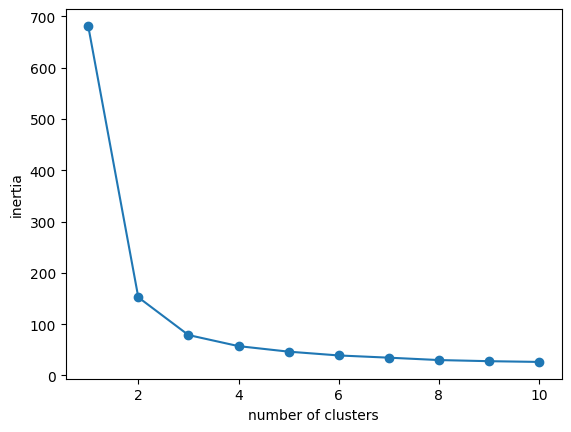

In [68]:
plt.plot(np.arange(1, 11), y, 'o-')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

This part of the code performs KMeans clustering on the Iris dataset with 3 clusters (as determined by the elbow method), and then visualizes the results using a pairplot. Here's a breakdown of what each part of the code does:

kmn = KMeans(n_clusters=3): This line creates a new KMeans object with 3 clusters.
kmn.fit(df): This line fits the KMeans object to the data in the df DataFrame. This means that the KMeans algorithm will be run on the data to determine the cluster assignments for each data point.
best_labels = kmn.predict(df): This line predicts the cluster labels for each data point in the df DataFrame using the trained KMeans model.
center = kmn.cluster_centers_: This line gets the coordinates of the cluster centers.
df_kmeans = df.copy(): This line creates a copy of the df DataFrame and assigns it to a new DataFrame named df_kmeans.
df_kmeans['label'] = best_labels: This line adds a new column named label to the df_kmeans DataFrame and assigns the predicted cluster labels to each row.
sns.pairplot(df_kmeans, hue='label'): This line creates a pairplot of the df_kmeans DataFrame, with each point colored by its predicted cluster label.
Overall, this code is useful for visualizing the results of KMeans clustering on the Iris dataset. The pairplot allows us to see how the data points are distributed across the different features and how they are grouped into clusters. The label column in the df_kmeans DataFrame can also be used for further analysis or visualization of the clustering results.

In [69]:
kmn = KMeans(n_clusters=3)
kmn.fit(df)
best_labels = kmn.predict(df)
center = kmn.cluster_centers_

In [70]:
df_kmeans = df.copy()
df_kmeans['label'] = best_labels

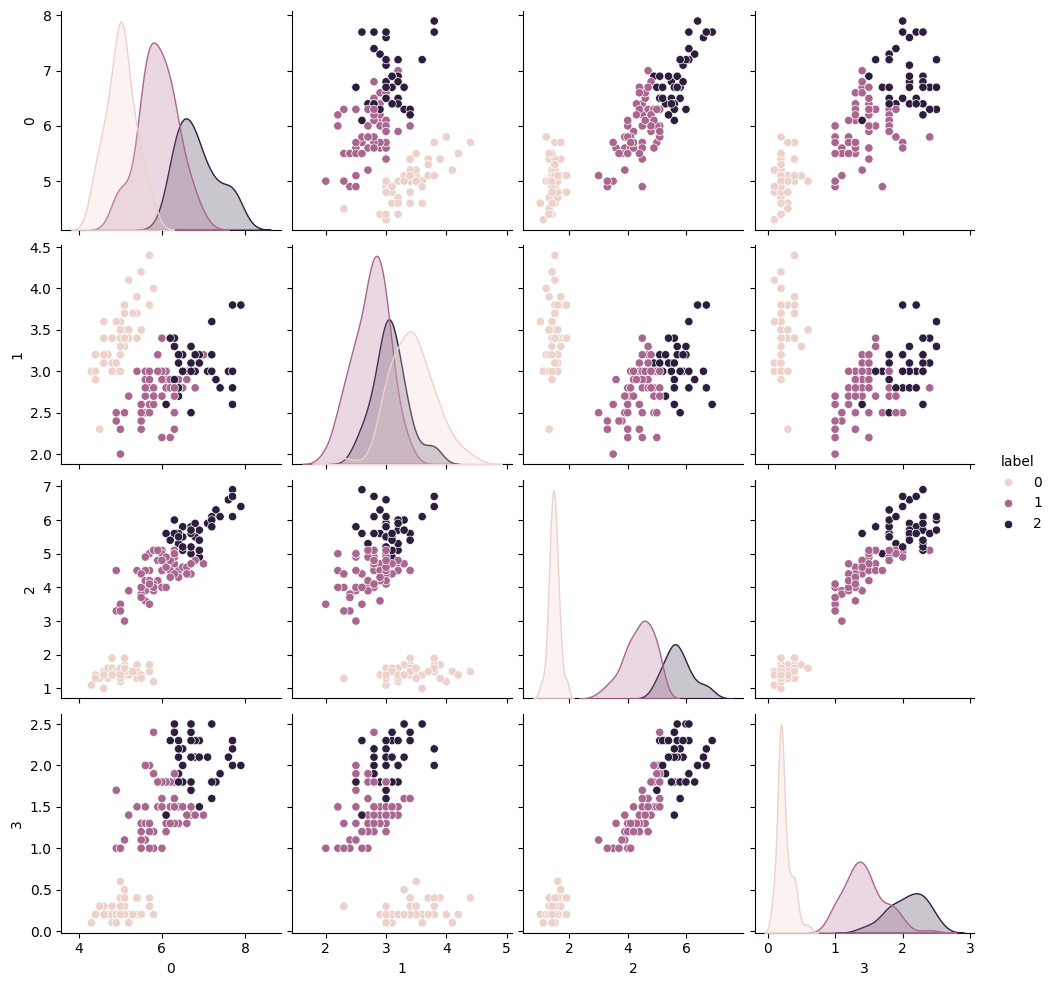

In [71]:
sns.pairplot(df_kmeans, hue='label')

Inertia, also known as the within-cluster sum of squares, measures the compactness of clusters. It is defined as the sum of squared distances between each data point and its assigned cluster center. A lower inertia value indicates that the data points are closer to their assigned cluster centers, and hence, the clustering is more compact and better. In the context of KMeans, you can calculate the inertia using the inertia_ attribute of the KMeans object. For example, kmn.inertia_ gives you the inertia of the KMeans clustering with kmn as the KMeans object.

The silhouette coefficient is a measure of how well each data point fits into its assigned cluster. It is defined as the difference between the average distance to the points in the same cluster (cohesion) and the average distance to the points in the nearest neighboring cluster (separation), normalized by the maximum of these two values. A silhouette coefficient close to 1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters, while a coefficient close to -1 indicates the opposite. A coefficient of 0 indicates that the data point is on or very close to the decision boundary between two clusters. You can calculate the silhouette coefficient using the silhouette_score function from the sklearn.metrics module. For example, silhouette_score(X, labels) gives you the silhouette coefficient for the clustering of data points X with labels labels.

In [72]:
print('Kmeans inertia:',kmn.inertia_)
silhouette_avg_kmeans = silhouette_score(df, best_labels)
print('silhouette_avg_kmeans',silhouette_avg_kmeans)

Kmeans inertia: 78.851441426146
silhouette_avg_kmeans 0.5528190123564095


the inertia value indicates that the KMeans clustering has a compactness of 78.85, and a lower value would indicate better clustering. The silhouette coefficient value of 0.55 indicates that, on average, the data points are moderately well-matched to their assigned clusters. A value close to 1 would indicate that the data points are well-matched to their assigned clusters, while a value close to -1 would indicate that the data points are poorly matched to their assigned clusters.

# Fuzzy CMeans

First of all, we need to install fuzzy part of scikit library which contain the fuzzy related methods, but it's not included in either conda nor colab

In [73]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=f80e2a1d7250f8176ce8c7daf323ac7a5680de2cb300923965f8ba068b8b19ce
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [74]:
import skfuzzy as fuzz

Fuzzy C-Means (FCM) is a clustering algorithm that allows a data point to belong to more than one cluster with different degrees of membership. Unlike traditional clustering algorithms, such as k-means or hierarchical clustering, which assign each data point to a single cluster, fuzzy clustering assigns a membership degree between 0 and 1 for each data point for each cluster. The FCM algorithm is an extension of the k-means algorithm that uses a fuzzy objective function instead of a crisp one.

The FCM algorithm starts by randomly initializing the cluster centers. Then, for each data point, it calculates the membership degree of the point in each cluster based on the distance between the point and the cluster center. The membership degree is calculated using the following formula:

μ_{ij} = (d_{ij}^2 / \sum \limits_{k=1}^c d_{ik}^2)^{1/m-1}

where μij is the membership degree of the i-th data point in the j-th cluster, dij is the Euclidean distance between the i-th data point and the j-th cluster center, and m is a parameter that controls the fuzziness of the clustering.

After calculating the membership degrees, the FCM algorithm updates the cluster centers by taking a weighted average of the data points based on their membership degrees:

v_{ij} = (\sum \limits_{k=1}^n \mu_{ik}^m x_{kj}) / \sum \limits_{k=1}^n \mu_{ik}^m   

where vij is the i-th cluster center, xkj is the j-th feature of the k-th data point, and n is the number of data points.

The FCM algorithm repeats the steps of calculating the membership degrees and updating the cluster centers until the cluster centers converge or a maximum number of iterations is reached.

This code performs Fuzzy C-Means (FCM) clustering on a dataset df with a range of cluster values from 2 to 10. The silhouette score is calculated for each clustering result and stored in a list silhouette_scores. The silhouette score is a measure of how well each data point fits into its assigned cluster. It ranges from -1 to 1, with higher values indicating better clustering.

Here's a breakdown of the code:

c_range = range(2, 11): This line sets the range of cluster values to try. In this case, the range is from 2 to 10.
silhouette_scores = []: This line initializes an empty list to store the silhouette scores for each clustering result.
for c in c_range:: This line starts a loop over the range of cluster values.
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(df.T, c=c, m=2, error=0.005, maxiter=1000): This line performs FCM clustering on the dataset df with the current number of clusters c. The m parameter is set to 2, which controls the degree of fuzziness of the clustering. The error and maxiter parameters control the convergence criteria of the algorithm.
cluster_assignments = np.argmax(u, axis=0): This line assigns each data point to the cluster with the highest membership degree.
fuzzy_centers = cntr.T: This line extracts the cluster centers from the FCM result.
silhouette_avg = silhouette_score(df, cluster_assignments): This line calculates the silhouette score for the current clustering result.
silhouette_scores.append(silhouette_avg): This line appends the silhouette score to the silhouette_scores list.
plt.plot(c_range, silhouette_scores): This line plots the silhouette scores for each clustering result.
plt.xlabel('Number of Clusters'), plt.ylabel('Silhouette Score'), plt.title('Silhouette Score vs. Number of Clusters'): These lines add labels and a title to the plot.
plt.show(): This line displays the plot.
The resulting plot shows the silhouette score for each clustering result, which can help determine the optimal number of clusters for the dataset.

Silhouette score for fuzzy CMeans with 2 clusters: 0.681
Silhouette score for fuzzy CMeans with 3 clusters: 0.550
Silhouette score for fuzzy CMeans with 4 clusters: 0.493
Silhouette score for fuzzy CMeans with 5 clusters: 0.364
Silhouette score for fuzzy CMeans with 6 clusters: 0.441
Silhouette score for fuzzy CMeans with 7 clusters: 0.351
Silhouette score for fuzzy CMeans with 8 clusters: 0.336
Silhouette score for fuzzy CMeans with 9 clusters: 0.305
Silhouette score for fuzzy CMeans with 10 clusters: 0.307


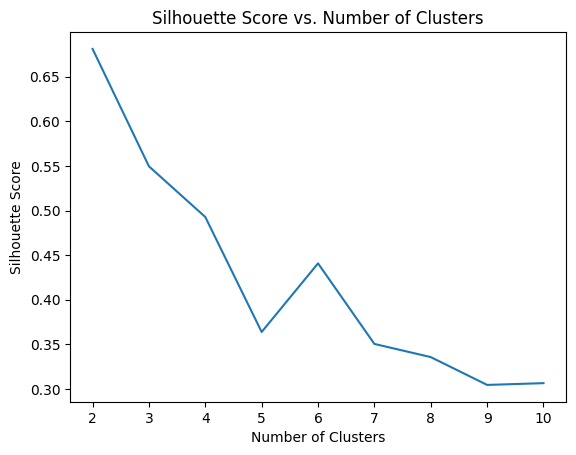

In [75]:
c_range = range(2, 11)

silhouette_scores = []

for c in c_range:
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(df.T, c=c, m=2, error=0.005, maxiter=1000)
    cluster_assignments = np.argmax(u, axis=0)
    fuzzy_centers = cntr.T


    silhouette_avg_fmeans = silhouette_score(df, cluster_assignments)
    print(f'Silhouette score for fuzzy CMeans with {c} clusters: {silhouette_avg_fmeans:.3f}')
    silhouette_scores.append(silhouette_avg_fmeans)

plt.plot(c_range, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

Now we do the same exact procedure as what we did for KMeans, the only difference is that we should probably use the amount of K we realized is the best using elbow method in KMeans

In [76]:
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(df.T, c=3, m=2, error=0.005, maxiter=1000)
cluster_assignments = np.argmax(u, axis=0)
fuzzy_centers = cntr.T

After running the clustering, we should get the clustering related scores, so we can easily see which one of them did better, although KMeans and FCM are based in the same principal, there are some differences that contribute to the metrics being different.

In [77]:
silhouette_avg_fmeans = silhouette_score(df, cluster_assignments)
print('silhouette for fuzzy CMeans:', silhouette_avg_fmeans)
inertia = np.sum(np.min(np.square(df), axis=1))
print('Inertia for fuzzy CMeans:', inertia)

silhouette for fuzzy CMeans: 0.549517512647162
Inertia for fuzzy CMeans: 302.33


After all that we draw a pairplot to see how does the data look after clustering with FCM

In [78]:
df_cmeans = df.copy()
df_cmeans['label'] = cluster_assignments